In [1]:
import os
import numpy as np
import pandas as pd
from model_training.cnn_classifier import CNNClassifier
from model_training.architectures.simple_convolution_network import SimpleConvolutionArchitecture

from model_training.measures import summary, get_true_and_predicted_labels

In [2]:
ARCHITRECTURE = SimpleConvolutionArchitecture()
CLASS_LABELS = os.listdir('../data/tsrc_spectrograms_cleaned/train')

## Spectrograms

In [11]:
DATASET_NAME = "tsrc_spectrograms"
DATASET_PATH = f"../data/{DATASET_NAME}"
FOLDER_PATH = f"../models/simple_cnn_{DATASET_NAME}"

## Audio-cleaned spectrograms

In [3]:
DATASET_NAME = "tsrc_spectrograms_cleaned"
DATASET_PATH = f"../data/{DATASET_NAME}"
FOLDER_PATH = f"../models/simple_cnn_{DATASET_NAME}"
model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE)

In [ ]:
model.fit(
    f"{DATASET_PATH}/train", 
    f"{DATASET_PATH}/validation",
    batch_size=32,
    n_epochs=6,
)

p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Running training on GPU...


 17%|█▋        | 1/6 [03:46<18:50, 226.02s/it]

Epoch 0 Done after 226.02195763587952 seconds


 33%|███▎      | 2/6 [07:43<15:29, 232.47s/it]

Epoch 1 Done after 236.97732377052307 seconds


 50%|█████     | 3/6 [11:35<11:37, 232.64s/it]

Epoch 2 Done after 232.84228348731995 seconds


 67%|██████▋   | 4/6 [15:33<07:49, 234.69s/it]

Epoch 3 Done after 237.8229467868805 seconds


 83%|████████▎ | 5/6 [19:37<03:57, 237.99s/it]

Epoch 4 Done after 243.83329319953918 seconds


100%|██████████| 6/6 [23:50<00:00, 238.45s/it]

Epoch 5 Done after 253.14769339561462 seconds
Finished Training


In [ ]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET_PATH}/test")

In [6]:
df = pd.DataFrame({'y_true' : y_true, "y_pred" : y_pred })
df.to_csv(f"{FOLDER_PATH}/predictions.csv", index=False)

Accuracy: 0.8235339446713416
Micro F1 Score: 0.8235339446713416
Macro F1 Score: 0.8251018000470574
Weighted F1 Score: 0.8238400788702939


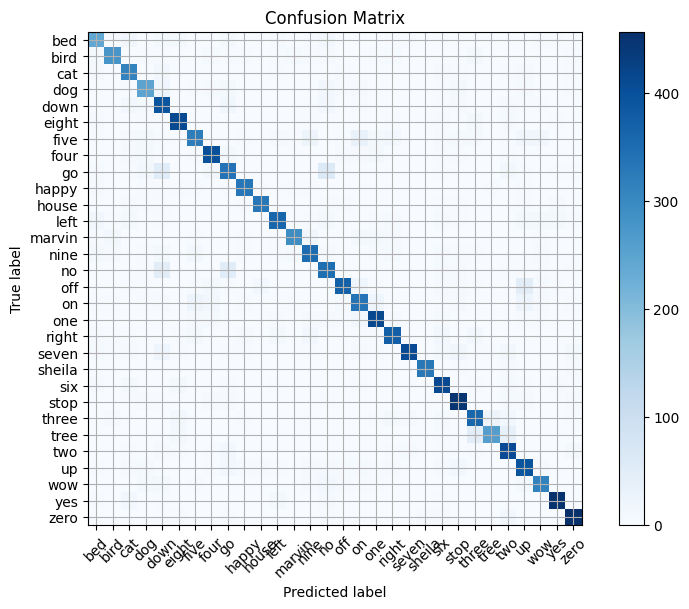

In [4]:
df = pd.read_csv(f"{FOLDER_PATH}/predictions.csv")
y_true = df["y_true"].values
y_pred = df["y_pred"].values
summary = summary(y_true, y_pred, CLASS_LABELS)